In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os; os.chdir('d:/First-Mlops-Project')

import os

print("Current Working Directory:", os.getcwd())


Current Working Directory: d:\First-Mlops-Project


In [3]:
data = pd.read_csv('dataset/train.csv')
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
data['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [5]:
data.sample(2)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
138297,138297,0.58,Ideal,G,SI1,61.7,56.4,5.30,5.37,3.29,1605
40800,40800,0.35,Ideal,I,VVS1,61.6,57.0,4.55,4.57,2.81,803


In [6]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
data.size

2129303

In [8]:
data.shape

(193573, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [10]:
data.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [11]:
data.drop(labels=['id'], axis=1, inplace=True)

In [12]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [13]:
data.duplicated().sum()

0

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [15]:
cat_col = data.columns[data.dtypes=="object"]

In [16]:
num_col = data.columns[data.dtypes!="object"]

In [17]:
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [18]:
data[cat_col]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [19]:
for col in cat_col:
    print(data[col].value_counts())
    print(f"here is the total count:{len(data[col].value_counts())}")
    print("=======================")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
here is the total count:5
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
here is the total count:7
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
here is the total count:8


In [20]:
data[num_col]


,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


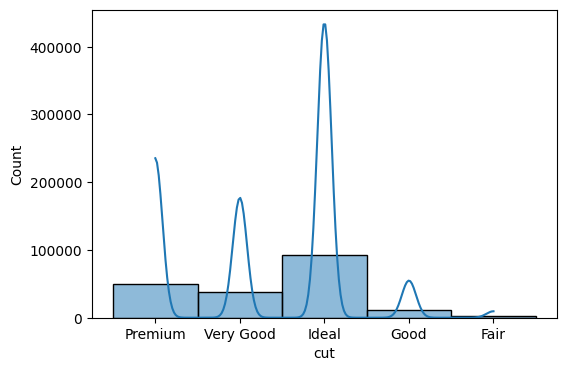

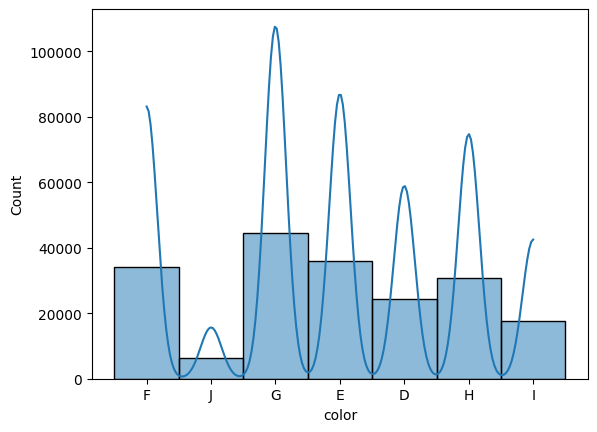

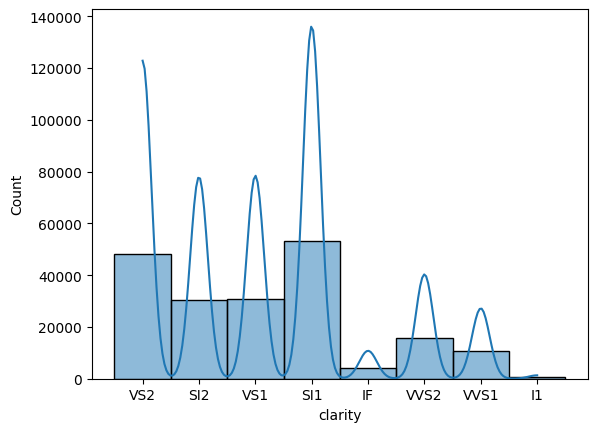

In [21]:
plt.figure(figsize=(6,4))

for col in cat_col:
    sns.histplot(data=data, x=col, kde=True)
    print("\n")
    plt.show()

<Axes: >

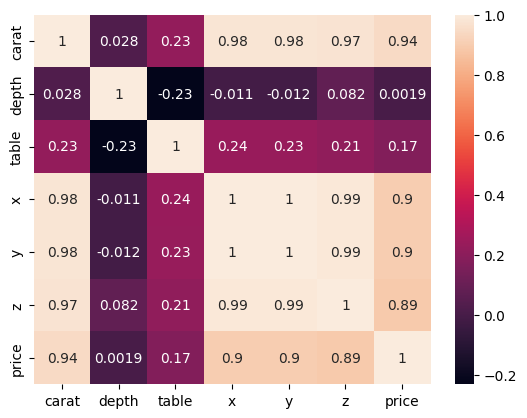

In [22]:
sns.heatmap(data[num_col].corr(), annot=True)

In [23]:
data[cat_col]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [24]:
# it is a oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [25]:
data["cut"]=data["cut"].map(cut_map)
data["clarity"]=data["clarity"].map(clarity_map)
data["color"]=data["color"].map(color_map)

In [26]:
data.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
5,1.51,3,7,3,62.8,58.0,7.34,7.29,4.59,7506
6,0.74,5,2,4,61.8,57.0,5.76,5.79,3.57,3229
7,1.34,4,4,2,62.5,57.0,7.00,7.05,4.38,6224
8,0.30,5,3,8,62.0,56.0,4.35,4.37,2.70,886
9,0.30,2,7,5,63.6,57.0,4.26,4.28,2.72,421
